In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")






In [31]:
from sklearn.tree import stratifiedshuffleSplit

ImportError: cannot import name 'stratifiedshuffleSplit' from 'sklearn.tree' (c:\Users\Calixte\Documents\Projet_Final3\.venv\Lib\site-packages\sklearn\tree\__init__.py)

In [2]:
# Nap load dataset lan
data = pd.read_csv("data/loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Dimansyon dataset lan
data.shape

(614, 13)

In [4]:
# Nap eksplore dataset lan
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Nap eksplore kolon dataset lan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Nap gade sin gen liy ki repete
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [3]:
# Nap elimine vale mankan yo koz sa ka bay algoritm M.L yo pwoblem.
data = data.dropna()

In [8]:
# Nap regade dataset lan.
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [9]:
# Nap gade sin gen data ki repete.
print(data.duplicated().sum())

0


In [4]:
data.shape

(480, 13)

In [5]:
X = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']
Y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [6]:
train, X_test = train_test_split(X,test_size=.20,random_state=42)

In [7]:
train_categorical = train.select_dtypes(exclude=['int64','Float64'])
train_categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
172,Male,Yes,3+,Not Graduate,No,Rural
288,Female,No,0,Graduate,No,Semiurban
607,Male,Yes,2,Not Graduate,No,Rural
55,Male,Yes,2,Graduate,No,Semiurban
461,Male,Yes,3+,Graduate,No,Urban


In [8]:
train_categorical = pd.get_dummies(train_categorical,drop_first=True,dtype=float)
train_categorical.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
172,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
607,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
55,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
461,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
train_categorical.shape

(384, 9)

In [10]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
train_numerical = train[numerical_features]
train_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
172,3522,0.0,81.0,180.0,1.0
288,4124,0.0,115.0,360.0,1.0
607,3987,1411.0,157.0,360.0,1.0
55,2708,1167.0,97.0,360.0,1.0
461,7740,0.0,128.0,180.0,1.0


In [11]:
scaler = MinMaxScaler()
scaler.fit(train_numerical)
train_scaled = pd.DataFrame(
    scaler.transform(train_numerical),
    index=train_numerical.index,
    columns=train_numerical.columns
)

train_scaled.head()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
172,0.041707,0.000000,0.121827,0.324324,1.0
288,0.049153,0.000000,0.179357,0.729730,1.0
607,0.047458,0.041700,0.250423,0.729730,1.0
55,0.031639,0.034489,0.148900,0.729730,1.0
461,0.093878,0.000000,0.201354,0.324324,1.0


In [12]:
Y_train, Y_test = train_test_split(Y,test_size=0.20,random_state=42)
Y_train.shape

(384,)

In [13]:
X_train_full = pd.concat([train_scaled,train_categorical],axis=1)
X_train_full.head()
X_train_full.shape

(384, 14)

In [ ]:
#X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
92,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
529,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
505,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
358,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
512,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y


In [14]:
#X_test = test.drop(['Loan_Status'], axis=1)

test_categorical = X_test.select_dtypes(exclude=['int64','Float64'])
test_categorical.head()

test_categorical = pd.get_dummies(test_categorical,drop_first=True,dtype=float)
test_categorical.shape


test_numerical = X_test[numerical_features]


test_scaled = pd.DataFrame(
    scaler.transform(test_numerical),
    index=test_numerical.index,
    columns=test_numerical.columns
)

X_test_full = pd.concat([test_scaled,test_categorical],axis=1)
X_test_full.head()
X_test_full.shape



(96, 14)

Training Accuracy     : 81.39 %
Model Accuracy score     : 79.17 %
----------------------------------------------------------


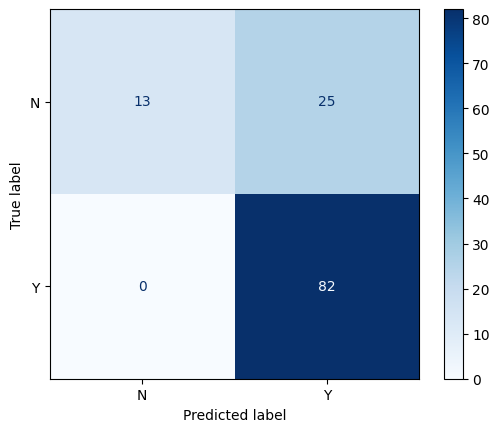

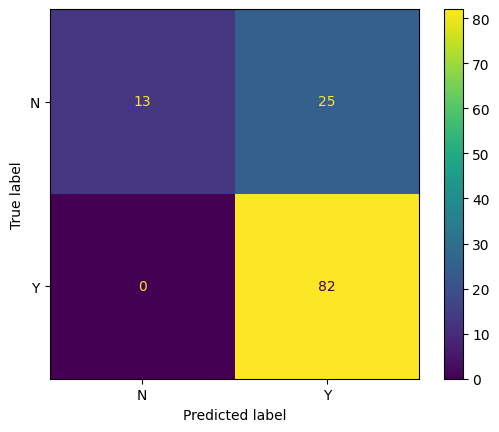

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train_full,Y_train)
Y_pred_lr = logreg.predict(X_test_full)

log_train = round(logreg.score(X_train_full,Y_train)*100,2)
log_accuracy = round(accuracy_score(Y_pred_lr,Y_test)*100,2)


print("Training Accuracy     :",log_train ,"%")
print("Model Accuracy score     :",log_accuracy ,"%")

print("\033[1m----------------------------------------------------------\033[0m")
#confusion_matrix(logreg,X_test_full,Y_test);
#plt.title('confusion_matrix');

y_pred = logreg.predict(X_test_full)
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap="Blues")
disp.plot()
plt.show()


In [18]:
C_vals = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16.5,17]
penalties = ['l2']

param = {'penalty': penalties, 'C' : C_vals}

logreg = LogisticRegression()

grid_log = GridSearchCV(estimator=LogisticRegression(),param_grid=param,scoring='accuracy',cv=5)



grid_log.fit(X_train_full,Y_train)




,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'penalty': ['l2']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [20]:
print(grid_log.best_score_)
print(grid_log.best_params_)
print(grid_log.best_estimator_)


0.8100136705399864
{'C': 5, 'penalty': 'l2'}
LogisticRegression(C=5)


Training Accuracy     : 80.73 %
Model Accuracy score     : 82.29 %
----------------------------------------------------------


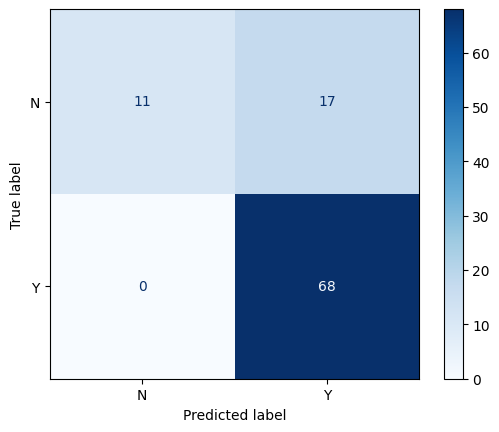

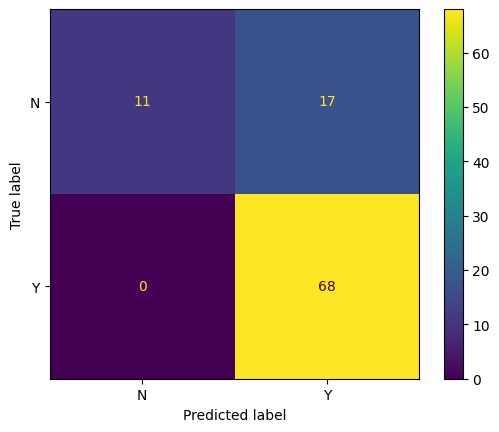

In [30]:
logreg_grid = grid_log.best_estimator_


log_train_grid = round(logreg_grid.score(X_train_full,Y_train)*100,2)
log_accuracy_grid = round(logreg_grid.score(X_test_full,Y_test)*100,2)


print("Training Accuracy     :",log_train_grid ,"%")
print("Model Accuracy score     :",log_accuracy_grid ,"%")

print("\033[1m----------------------------------------------------------\033[0m")
#confusion_matrix(logreg,X_test_full,Y_test);
#plt.title('confusion_matrix');

y_pred = grid_log.predict(X_test_full)
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap="Blues")
disp.plot()
plt.show()






In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
params = {
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,50,100,120],
    'criterion' : ['gini','entropy']
    }

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

grid_dec = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid=params,
                        cv=cv, n_jobs=-1,verbose=1,scoring = 'accuracy')

grid_dec.fit(X_train_full,Y_train)




Fitting 10 folds for each of 40 candidates, totalling 400 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [10, 20, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedShu...ain_size=None)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [41]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)

0.784375
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)


Training Accuracy     : 80.47 %
Model Accuracy score     : 82.29 %
----------------------------------------------------------


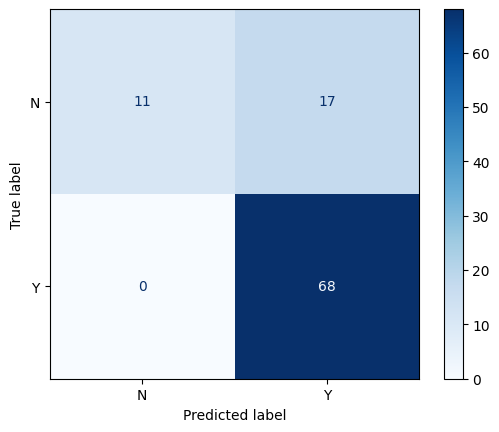

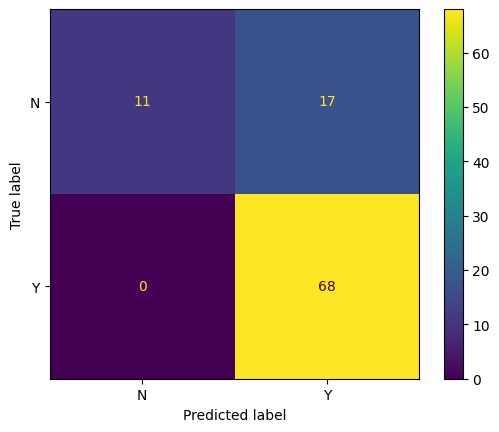

In [42]:
dec_grid = grid_dec.best_estimator_


decision_train_grid = round(dec_grid.score(X_train_full,Y_train)*100,2)
decision_accuracy_grid = round(dec_grid.score(X_test_full,Y_test)*100,2)


print("Training Accuracy     :",decision_train_grid ,"%")
print("Model Accuracy score     :",decision_accuracy_grid ,"%")

print("\033[1m----------------------------------------------------------\033[0m")
#confusion_matrix(logreg,X_test_full,Y_test);
#plt.title('confusion_matrix');

y_pred = dec_grid.predict(X_test_full)
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap="Blues")
disp.plot()
plt.show()




In [ ]:
k_range = range(1,)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_full,Y_train)
